# OWID is one of the most complete dataset for general usage

In [1]:
# this is my comment
! pwd


/Users/nengkuantu/CYCU/CYCU2022/BigData/20221031/SolutionForLastHW


In [2]:
! ls  # windows platform: use ! dir

OWIDdataset_WhyTaiwanDeathRateByCaseIsHigherThanWW_in2021June.ipynb


In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt

# 1. Read OWID data from what I just downloaded

In [4]:
# https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv
time1 = time.time()
DF = pd.read_csv('~/downloads/owid-covid-data.csv')
time2 = time.time()
print(time2 - time1)

2.610913038253784


In [67]:
DF.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# 2. Convert dates (yyyy-mm-dd) to Julian day (days since 2020-01-01)

In [5]:
reference_datetime = pd.to_datetime('2019-12-31 15:23:46',format='%Y-%m-%d')
print(reference_datetime)
print(type(reference_datetime))
tmp = pd.to_datetime('2020-12-31',format='%Y-%m-%d')
tmp - reference_datetime

2019-12-31 15:23:46
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timedelta('365 days 08:36:14')

In [6]:
int(str(tmp - reference_datetime).split()[0])

365

In [7]:
tmp2 = tmp - reference_datetime
print(type(tmp2))
tmp2

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


Timedelta('365 days 08:36:14')

In [8]:
type(tmp2.days)

int

In [9]:
tmp = pd.to_datetime(DF.date,format='%Y-%m-%d') - reference_datetime
print(type(tmp), type(tmp.iloc[0]))
print(tmp.head())
print(tmp.dt)
print(tmp.dt.days.head())

<class 'pandas.core.series.Series'> <class 'pandas._libs.tslibs.timedeltas.Timedelta'>
0   54 days 08:36:14
1   55 days 08:36:14
2   56 days 08:36:14
3   57 days 08:36:14
4   58 days 08:36:14
Name: date, dtype: timedelta64[ns]
0    54
1    55
2    56
3    57
4    58
Name: date, dtype: int64


In [10]:
DF['days'] = tmp.dt.days
DF

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,days
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,54
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,55
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,56
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,57
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,58
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,59
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,60
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,61
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,62
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,63


# 3. The comparison of Taiwan's death rate by cases with WW in 2021 June
------
Taiwan's death rate is about 5% at that time, while WW is about 2%.

In [11]:
DF.date.max()

'2022-10-15'

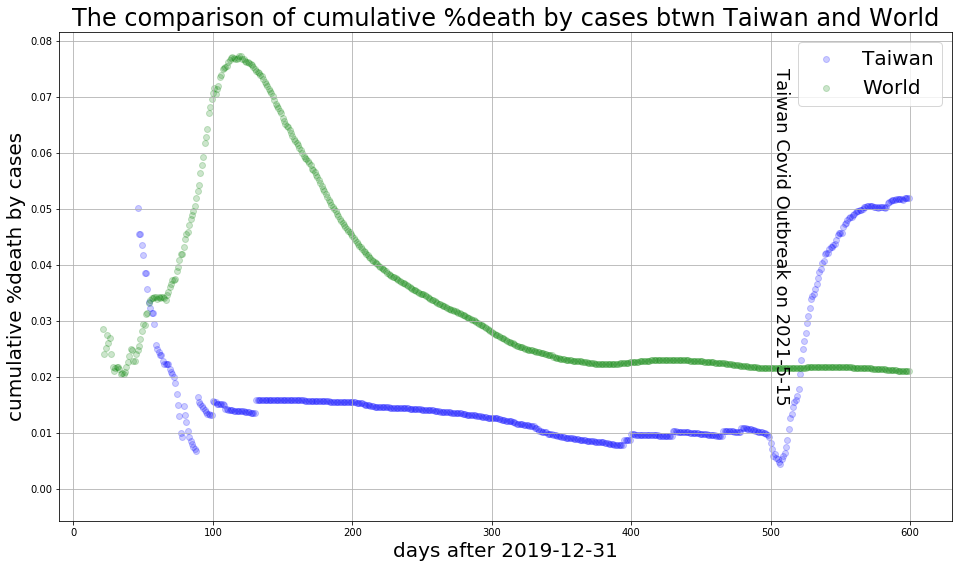

In [12]:
plt.figure(figsize=(16.0, 9.0))

tmp = DF[DF.location == 'Taiwan']
tmp = tmp[tmp.days < 600]
plt.scatter(tmp.days, tmp.total_deaths_per_million/tmp.total_cases_per_million, c='b', alpha=0.2)

tmp = DF[DF.location == 'World']
tmp = tmp[tmp.days < 600]
plt.scatter(tmp.days, tmp.total_deaths_per_million/tmp.total_cases_per_million, c='g', alpha=0.2)

plt.legend(['Taiwan', 'World'], fontsize=20)
plt.xlabel('days after 2019-12-31', fontsize=20)
plt.ylabel("cumulative %death by cases", fontsize=20)
plt.title('The comparison of cumulative %death by cases btwn Taiwan and World', fontsize=24)
plt.text(501, 0.015, 'Taiwan Covid Outbreak on 2021-5-15', rotation=270, fontsize=18, verticalalignment='bottom')
plt.grid()

# 4. Speculation of potential reasons:
------
- low vaccination or poor vaccination operation
- poor medical system
- high dark number as a result of low test and high positive rate.
- higher senior population

In [19]:
DF600 = DF[DF.days == 510]

In [66]:
DF600.date.max()

'2021-05-25'

In [21]:
tmp = DF600[['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations_per_hundred', 
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'life_expectancy']]

tmp.corr().sort_values('total_deaths_per_million')

,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,tests_per_case,total_vaccinations_per_hundred,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy
extreme_poverty,-0.506284,-0.025900,-0.289246,-0.430127,-0.053287,-0.001707,-0.266753,-0.217669,-0.057806,-0.229095,...,-0.056026,-0.413028,-0.025685,-0.033003,-0.697352,-0.573979,-0.557852,-0.502369,1.000000,-0.747518
tests_per_case,-0.105658,-0.018251,-0.040273,-0.089906,0.008481,0.003118,0.118799,0.098146,0.986325,0.078568,...,1.000000,0.014635,0.677473,-0.011555,0.060013,0.003411,-0.015192,-0.029765,-0.056026,0.029382
new_tests_smoothed,-0.085096,0.116699,-0.040061,-0.067835,0.859347,0.991374,0.131125,0.151671,1.000000,0.102802,...,0.986325,0.023997,0.767775,-0.005900,0.073853,0.019599,0.001906,-0.013121,-0.057806,0.036640
population,-0.060031,0.950840,-0.017105,-0.042363,0.687192,0.846802,-0.108863,-0.098130,0.767775,-0.007699,...,0.677473,-0.096762,1.000000,-0.019710,0.010275,-0.001921,-0.006904,-0.026373,-0.025685,-0.015506
population_density,0.018987,-0.018085,0.011333,0.005991,-0.013244,0.027650,0.131854,0.054806,-0.005900,0.155311,...,-0.011555,0.039459,-0.019710,1.000000,0.147549,0.062454,0.031397,0.408468,-0.033003,0.228539
new_cases_smoothed,-0.014183,1.000000,0.023117,0.010947,0.601529,0.805130,-0.073263,-0.061946,0.116699,-0.045626,...,-0.018251,-0.083333,0.950840,-0.018085,0.014265,0.002232,-0.001708,-0.022397,-0.025900,-0.005516
positive_rate,0.009942,0.110648,0.446753,0.017428,-0.099987,-0.075099,-0.281853,-0.223804,-0.083893,-0.181707,...,-0.079515,-0.223945,-0.026089,0.080631,-0.200448,-0.235174,-0.233445,-0.229514,-0.061880,-0.031225
new_tests_smoothed_per_thousand,0.330552,-0.045626,0.136966,0.092027,0.061091,0.130656,0.876988,0.981675,0.102802,1.000000,...,0.078568,0.394136,-0.007699,0.155311,0.288282,0.235783,0.237030,0.340602,-0.229095,0.298341
new_tests,0.070897,0.805130,-0.035794,0.098594,0.889846,1.000000,0.121287,0.151078,0.991374,0.130656,...,0.003118,0.080146,0.846802,0.027650,0.087198,0.088029,0.086699,0.118042,-0.001707,0.045741
new_cases_smoothed_per_million,0.385603,0.023117,1.000000,0.099995,-0.045252,-0.035794,0.121587,0.118459,-0.040061,0.136966,...,-0.040273,0.302208,-0.017105,0.011333,0.131351,0.021698,0.036789,0.096238,-0.289246,0.153058


# Dark numbers

In [39]:
Taiwan = (tmp[tmp.location == 'Taiwan']
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
        'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate']])
World = tmp[tmp.location == 'World']\
        [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
        'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate']]

In [40]:
Taiwan

,location,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
196213,Taiwan,228.668,456.571,19.136,17.206,0.788,0.0243


In [41]:
World

,location,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
220708,World,21286.442,566879.0,71.673,NaN,NaN,NaN


In [26]:
pd.concat((Taiwan, World))

,location,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
196213,Taiwan,228.668,456.571,19.136,17.206,0.788,0.0243
220708,World,21286.442,566879.000,71.673,NaN,NaN,NaN


In [38]:
tmp[['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
        'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate']].describe()

,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
count,225.000000,225.000000,224.000000,102.000000,130.000000,119.000000
mean,33415.350253,10270.228529,94.249371,882.216627,3.573623,0.071583
std,38834.094780,52379.188824,264.386444,1355.905342,7.759064,0.086529
min,8.005000,0.000000,0.000000,1.595000,0.003000,0.000000
25%,1821.207000,5.857000,2.209750,126.565750,0.396000,0.017750
50%,16050.627000,150.143000,28.441000,505.322000,1.393500,0.039000
75%,61378.475000,1243.000000,91.559000,939.106750,3.098500,0.085900
max,172887.618000,566879.000000,2992.708000,7494.895000,62.417000,0.456700


In [42]:
desc = tmp[['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
        'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate']].describe()
type(desc)

pandas.core.frame.DataFrame

In [43]:
desc[desc.index == 'mean']

,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
mean,33415.350253,10270.228529,94.249371,882.216627,3.573623,0.071583


In [44]:
desc[desc.index == 'mean'].reset_index()

,index,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
0,mean,33415.350253,10270.228529,94.249371,882.216627,3.573623,0.071583


In [51]:
desc = desc[desc.index == 'mean'].reset_index().rename({'index': 'location'}, axis=1, inplace=False)
desc

,location,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
0,mean,33415.350253,10270.228529,94.249371,882.216627,3.573623,0.071583


In [52]:
pd.concat((Taiwan, World, desc))

,location,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
196213,Taiwan,228.668000,456.571000,19.136000,17.206000,0.788000,0.024300
220708,World,21286.442000,566879.000000,71.673000,NaN,NaN,NaN
0,mean,33415.350253,10270.228529,94.249371,882.216627,3.573623,0.071583


In [53]:
Taiwan = (tmp[tmp.location == 'Taiwan']
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
        'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate']])

USA = (tmp[tmp.location == 'United States']
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
        'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate']])

Japan = (tmp[tmp.location == 'Japan']
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
        'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate']])
Philippines = (tmp[tmp.location == 'Philippines']
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
        'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate']])

In [55]:
pd.concat((Taiwan, Philippines, Japan, USA, World, desc))

,location,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
196213,Taiwan,228.668000,456.571000,19.136000,17.206000,0.788000,0.024300
160529,Philippines,10437.905000,4897.714000,43.008000,109.762000,0.438000,0.098200
102076,Japan,5824.944000,4632.143000,37.172000,106.116000,0.719000,0.051700
211672,United States,98784.213000,24057.143000,71.387000,1328.830000,2.579000,0.026000
220708,World,21286.442000,566879.000000,71.673000,NaN,NaN,NaN
0,mean,33415.350253,10270.228529,94.249371,882.216627,3.573623,0.071583


# Age

In [75]:
Taiwan = tmp[tmp.location == 'Taiwan']\
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
       'median_age', 'aged_65_older','aged_70_older', 'life_expectancy']]
World = tmp[tmp.location == 'World']\
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
       'median_age', 'aged_65_older','aged_70_older', 'life_expectancy']]

In [76]:
pd.concat((Taiwan, World))

,location,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,median_age,aged_65_older,aged_70_older,life_expectancy
196213,Taiwan,228.668,456.571,19.136,42.2,NaN,8.353,80.46
220708,World,21286.442,566879.000,71.673,30.9,8.696,5.355,72.58


In [77]:
Philippines = tmp[tmp.location == 'Philippines']\
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
       'median_age', 'aged_65_older','aged_70_older', 'life_expectancy']]
Japan = tmp[tmp.location == 'Japan']\
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
       'median_age', 'aged_65_older','aged_70_older', 'life_expectancy']]
USA = tmp[tmp.location == 'United States']\
          [['location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
       'median_age', 'aged_65_older','aged_70_older', 'life_expectancy']]


In [78]:
pd.concat((Taiwan, Philippines, Japan, USA, World))

,location,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,median_age,aged_65_older,aged_70_older,life_expectancy
196213,Taiwan,228.668,456.571,19.136,42.2,NaN,8.353,80.46
160529,Philippines,10437.905,4897.714,43.008,25.2,4.803,2.661,71.23
102076,Japan,5824.944,4632.143,37.172,48.2,27.049,18.493,84.63
211672,United States,98784.213,24057.143,71.387,38.3,15.413,9.732,78.86
220708,World,21286.442,566879.000,71.673,30.9,8.696,5.355,72.58


2021-05-25


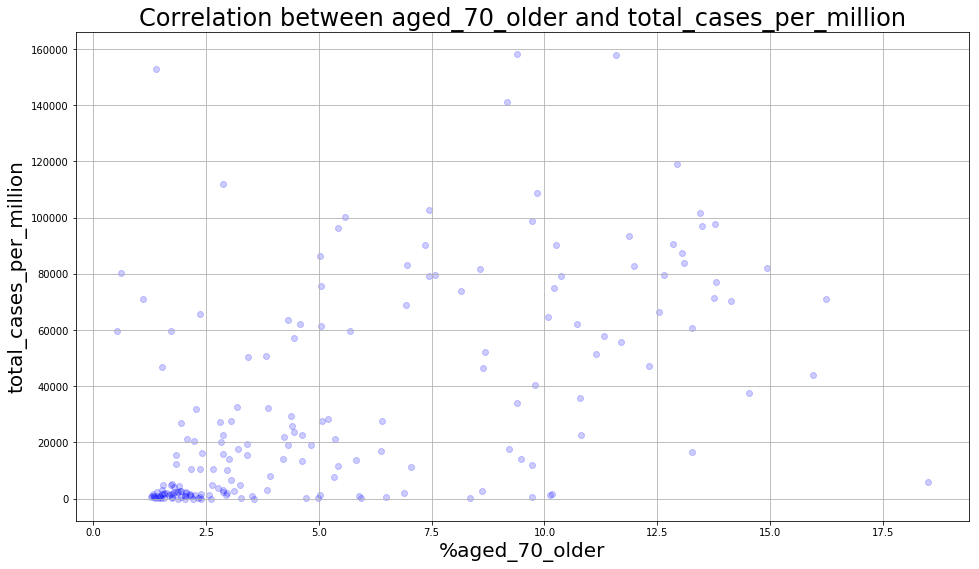

In [79]:
DF600 = DF[DF.days == 510]
print(DF600.date.max())

plt.figure(figsize=(16.0, 9.0))

tmp = DF600
plt.scatter(tmp.aged_70_older, tmp.total_cases_per_million, c='b', alpha=0.2)

plt.xlabel('%aged_70_older', fontsize=20)
plt.ylabel("total_cases_per_million", fontsize=20)
plt.title('Correlation between aged_70_older and total_cases_per_million', fontsize=24)
plt.grid()

In [86]:
DF[(DF.location == 'Japan') & (DF.days == 510)][['aged_70_older']]

,aged_70_older
102076,18.493


In [88]:
DF[(DF.location == 'Taiwan') & (DF.days == 510)][['aged_70_older', 'total_cases_per_million']]

,aged_70_older,total_cases_per_million
196213,8.353,228.668


2021-05-25


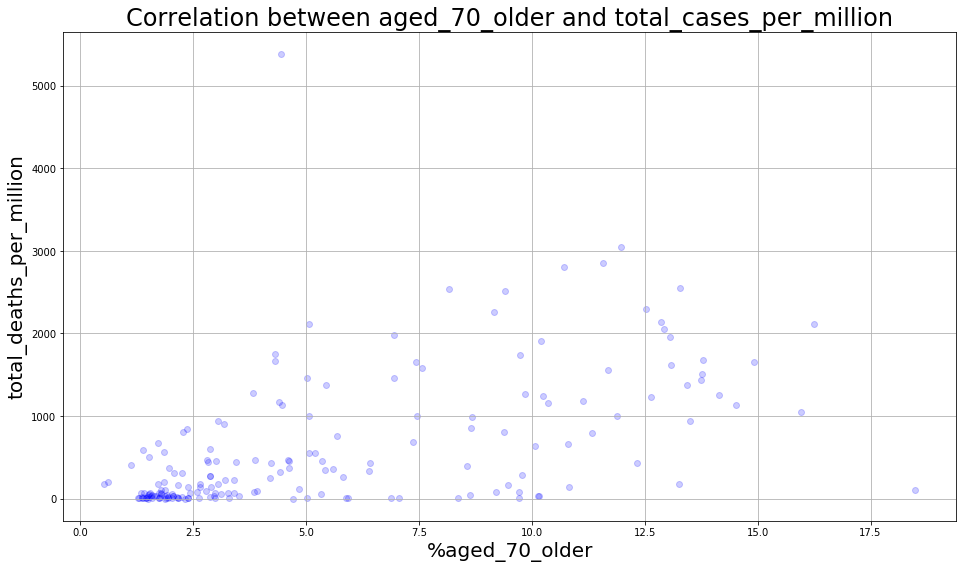

In [89]:
DF600 = DF[DF.days == 510]
print(DF600.date.max())

plt.figure(figsize=(16.0, 9.0))

tmp = DF600
plt.scatter(tmp.aged_70_older, tmp.total_deaths_per_million, c='b', alpha=0.2)

plt.xlabel('%aged_70_older', fontsize=20)
plt.ylabel("total_deaths_per_million", fontsize=20)
plt.title('Correlation between aged_70_older and total_cases_per_million', fontsize=24)
plt.grid()

In [90]:
DF[(DF.location == 'Taiwan') & (DF.days == 510)][['aged_70_older', 'total_deaths_per_million']]

,aged_70_older,total_deaths_per_million
196213,8.353,1.467


In [91]:
DF[(DF.location == 'Philippines') & (DF.days == 510)][['aged_70_older', 'total_deaths_per_million']]

,aged_70_older,total_deaths_per_million
160529,2.661,175.79


In [74]:
DF[DF.location == 'Taiwan'][['date', 'location', 'total_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', \
        'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate']].iloc[450:650]

,date,location,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,positive_rate
196168,2021-04-10,Taiwan,44.258,1.571,0.066,8.194,0.024,0.0027
196169,2021-04-11,Taiwan,44.300,1.429,0.060,8.201,0.024,0.0025
196170,2021-04-12,Taiwan,44.342,1.429,0.060,8.233,0.027,0.0022
196171,2021-04-13,Taiwan,44.510,1.714,0.072,8.255,0.023,0.0031
196172,2021-04-14,Taiwan,44.719,2.429,0.102,8.280,0.023,0.0045
196173,2021-04-15,Taiwan,44.761,2.571,0.108,8.302,0.022,0.0049
196174,2021-04-16,Taiwan,44.845,2.286,0.096,8.325,0.020,0.0048
196175,2021-04-17,Taiwan,44.929,2.286,0.096,8.331,0.020,0.0049
196176,2021-04-18,Taiwan,44.971,2.286,0.096,8.336,0.019,0.0050
196177,2021-04-19,Taiwan,45.097,2.571,0.108,8.366,0.019,0.0056


In [71]:
0.186/45

0.0041333333333333335